In [1]:
from typing import List, Union

import numpy as np
import json
import matplotlib.pyplot as plt

"""
Authot: Josue N Rivera

"""

import larp

In [2]:
# Parameters

max_iter = 10000
step_size = 0.01

tolerance_grad = 1e-4
tolerance_goal = 0.005
size = 120.0
mean_buffer = 5

attractive_constant = 1

In [3]:
with open("scenes\surrounded.rgj") as file:
        rgjs:list = json.load(file)
    
field = larp.PotentialField(size=(size, size), rgjs=rgjs)
field_display = field.to_image(resolution=400, center_point=[45, 45])

def quadratic_attractive_force(points:Union[np.ndarray, List[larp.Point]], end:larp.Point = np.array([0, 0]), constant=attractive_constant):
    points = np.array(points)
    end = np.array(end)
    return constant * (end - points)

def get_GD_route(start:larp.Point, end:larp.Point):
    current = start
    route_path = [current]
    average_point = np.zeros((mean_buffer, 2))

    i = 0
    while i < max_iter:
        repulsive_force = -field.gradient([current])[0] * (1/((field.eval([current])[0])-1)**2) # field.grad(x) * d/dx [1/(field.eval(x)-1)]
        direction = quadratic_attractive_force([current], end=end)[0] + repulsive_force
        unit_direction = direction/np.linalg.norm(direction)

        new_current = current + step_size*unit_direction
        route_path.append(new_current)
        i+=1

        average_point[i%mean_buffer] = current
        if np.linalg.norm(direction) < tolerance_grad or np.linalg.norm(average_point.mean(axis=0) - current) < tolerance_goal:
            break

        current = new_current

    return np.array(route_path)

In [4]:
start = np.array((-1, 25)) # (x, y)
end = np.array((62, 25))
route_path = get_GD_route(start=start, end=end)
found = np.linalg.norm(end - route_path[-1]) < step_size*2
print(f"Route found: {found}")

Route found: True


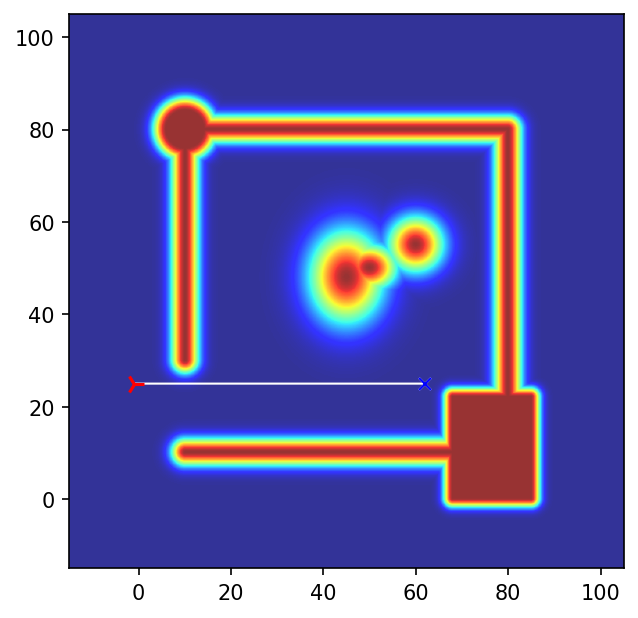

In [5]:

plt.figure(dpi=150)
plt.imshow(field_display, cmap='jet', extent=field.get_extent(), alpha=0.8)
plt.plot(route_path[:, 0], route_path[:, 1], color="#fff", alpha=1.0, linewidth=1.0)
plt.plot(route_path[0, 0], route_path[0, 1], 'r4', markersize=10.0, markeredgewidth=1.5)
plt.plot(route_path[-1, 0], route_path[-1, 1], 'wx')
plt.plot(end[0], end[1], 'bx')
plt.show()

In [6]:
# Highest potential value
highest = field.eval(larp.interpolate_along_route(route_path, step=1e-4)).max()
print(f"Highest potential: {highest}")

# Distance traveled
dist = larp.route_distance(route_path)
print(f"Distance traveled: {dist}")

# Area under route
area = field.estimate_route_area(route_path, step=1e-4)
print(f"Total area under route: {area}")

# Average area under route
avg_area = area/dist
print(f"Average area under route: {avg_area}")

# Area under route (scaled to infinity via 1/(x-1))
area = field.estimate_route_area(route_path, step=1e-4, scale_transform=lambda x: 1/(1.0 - x + 1e-10)-1)
print(f"Total area under route (scaled): {area}")

# Average area under route (scaled to infinity via 1/(x-1))
avg_area = area/dist
print(f"Average area under route (scaled): {avg_area}")

Highest potential: 0.06192671371905375
Distance traveled: 63.01000000000002
Total area under route: 0.40058388729523003
Average area under route: 0.006357465280038564
Total area under route (scaled): 0.4160287320784105
Average area under route (scaled): 0.006602582638920971


Route found: False


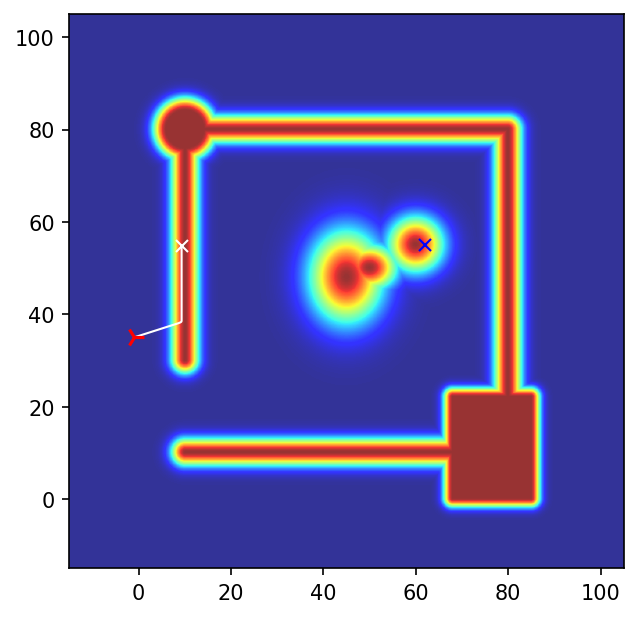

Highest potential: 0.9478812874234439
Distance traveled: 28.129999999996983
Total area under route: 18.471235939292416
Average area under route: 0.6566383199180376
Total area under route (scaled): 319.6893479020078
Average area under route (scaled): 11.3647119766101


In [7]:
start = (-1, 35) # (x, y)
end = (62, 55)
route_path = get_GD_route(start=start, end=end)
found = np.linalg.norm(end - route_path[-1]) < step_size*2
print(f"Route found: {found}")

plt.figure(dpi=150)
plt.imshow(field_display, cmap='jet', extent=field.get_extent(), alpha=0.8)
plt.plot(route_path[:, 0], route_path[:, 1], color="#fff", alpha=1.0, linewidth=1.0)
plt.plot(route_path[0, 0], route_path[0, 1], 'r4', markersize=10.0, markeredgewidth=1.5)
plt.plot(route_path[-1, 0], route_path[-1, 1], 'wx')
plt.plot(end[0], end[1], 'bx')
plt.show()

# Highest potential value
highest = field.eval(larp.interpolate_along_route(route_path, step=1e-4)).max()
print(f"Highest potential: {highest}")

# Distance traveled
dist = larp.route_distance(route_path)
print(f"Distance traveled: {dist}")

# Area under route
area = field.estimate_route_area(route_path, step=1e-4)
print(f"Total area under route: {area}")

# Average area under route
avg_area = area/dist
print(f"Average area under route: {avg_area}")

# Area under route (scaled to infinity via 1/(x-1))
area = field.estimate_route_area(route_path, step=1e-4, scale_transform=lambda x: 1/(1.0 - x + 1e-10)-1)
print(f"Total area under route (scaled): {area}")

# Average area under route (scaled to infinity via 1/(x-1))
avg_area = area/dist
print(f"Average area under route (scaled): {avg_area}")

Route found: False


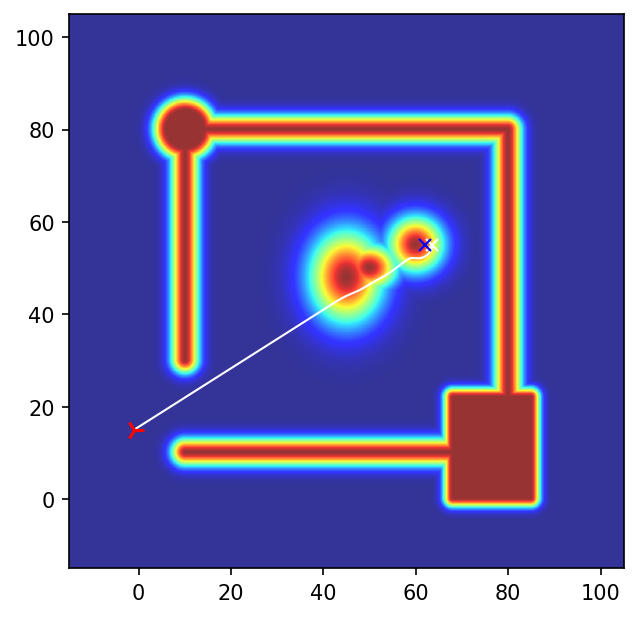

Highest potential: 0.8665156724841058
Distance traveled: 76.83999999999982
Total area under route: 20.88465259437967
Average area under route: 0.27179402126990787
Total area under route (scaled): 79.71345920063872
Average area under route (scaled): 1.0373953565934269


In [8]:
start = (-1, 15) # (x, y)
end = (62, 55)
route_path = get_GD_route(start=start, end=end)
found = np.linalg.norm(end - route_path[-1]) < step_size*2
print(f"Route found: {found}")

plt.figure(dpi=150)
plt.imshow(field_display, cmap='jet', extent=field.get_extent(), alpha=0.8)
plt.plot(route_path[:, 0], route_path[:, 1], color="#fff", alpha=1.0, linewidth=1.0)
plt.plot(route_path[0, 0], route_path[0, 1], 'r4', markersize=10.0, markeredgewidth=1.5)
plt.plot(route_path[-1, 0], route_path[-1, 1], 'wx')
plt.plot(end[0], end[1], 'bx')
plt.show()

# Highest potential value
highest = field.eval(larp.interpolate_along_route(route_path, step=1e-4)).max()
print(f"Highest potential: {highest}")

# Distance traveled
dist = larp.route_distance(route_path)
print(f"Distance traveled: {dist}")

# Area under route
area = field.estimate_route_area(route_path, step=1e-4)
print(f"Total area under route: {area}")

# Average area under route
avg_area = area/dist
print(f"Average area under route: {avg_area}")

# Area under route (scaled to infinity via 1/(x-1))
area = field.estimate_route_area(route_path, step=1e-4, scale_transform=lambda x: 1/(1.0 - x + 1e-10)-1)
print(f"Total area under route (scaled): {area}")

# Average area under route (scaled to infinity via 1/(x-1))
avg_area = area/dist
print(f"Average area under route (scaled): {avg_area}")